
# CC3039 — Modelación y Simulación  
**Semestre II - 2025**  
**Laboratorio 5 P2 — Práctica — Problema 2 (Watts–Strogatz)**

> **Nota de reproducibilidad:** se fija una semilla aleatoria para garantizar consistencia entre ejecuciones.


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Semilla reproducible (NumPy Generator)
rng = np.random.default_rng(2025)

print("Versions:")
print("  numpy      :", np.__version__)
print("  networkx   :", nx.__version__)
print("  matplotlib :", plt.matplotlib.__version__)


Versions:
  numpy      : 1.26.4
  networkx   : 3.4.2
  matplotlib : 3.8.4


In [ ]:
n, k = 500, 6
p_list = [0, 1e-4, 1e-3, 1e-2, 0.1, 1.0]

clustering = []
avg_path = []

for p in p_list:
    G = nx.watts_strogatz_graph(n=n, k=k, p=p, seed=int(rng.integers(0, 1_000_000)))
    C = nx.average_clustering(G)
    if nx.is_connected(G):
        L = nx.average_shortest_path_length(G)
    else:
        H = G.subgraph(max(nx.connected_components(G), key=len)).copy()
        L = nx.average_shortest_path_length(H)
    clustering.append(C)
    avg_path.append(L)

print("p values            :", p_list)
print("Clustering promedio :", clustering)
print("Path avg (L)        :", avg_path)


p values            : [0, 0.0001, 0.001, 0.01, 0.1, 1.0]
Clustering promedio : [0.5999999999999999, 0.5999999999999999, 0.5977142857142855, 0.5883142857142852, 0.4395619047619043, 0.012275468975468969]
Path avg (L)        : [42.08416833667334, 42.08416833667334, 33.0064128256513, 16.04993987975952, 5.395030060120241, 3.6869739478957917]


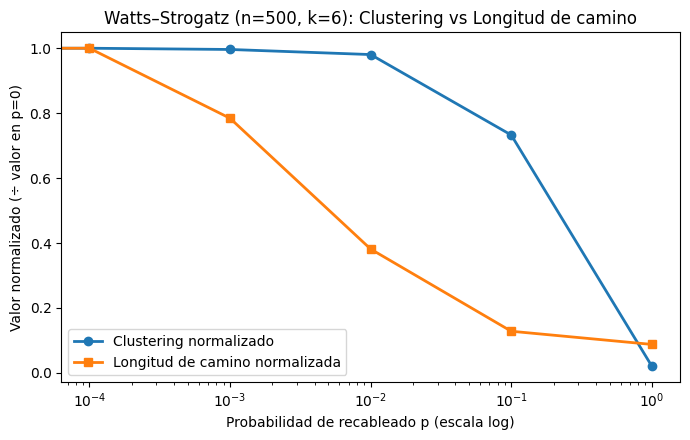

In [ ]:
C0, L0 = clustering[0], avg_path[0]
clust_norm = [c / C0 for c in clustering]
path_norm  = [l / L0 for l in avg_path]

plt.figure(figsize=(7, 4.5))
plt.plot(p_list, clust_norm, marker='o', linewidth=2, label='Clustering normalizado')
plt.plot(p_list, path_norm,  marker='s', linewidth=2, label='Longitud de camino normalizada')
plt.xscale('log', base=10)
plt.xlabel('Probabilidad de recableado p (escala log)')
plt.ylabel('Valor normalizado (÷ valor en p=0)')
plt.title('Watts–Strogatz (n=500, k=6): Clustering vs Longitud de camino')
plt.legend()
plt.tight_layout()
plt.show()



## 4) Preguntas de análisis (responder con base en la gráfica generada)

1. **¿Qué métrica disminuye más drásticamente** cuando \( p \) cambia de 0 a un valor muy pequeño como 0.01: el **agrupamiento** o la **longitud de camino promedio**?  

   Se desploma mucho más la longitud de camino promedio. Con unos pocos “atajos” ya casi todos los nodos quedan a pocas saltos, mientras el agrupamiento casi no se mueve en ese tramo.

2. **¿Existe una región de \( p \)** en la que la red **mantiene >80%** del **agrupamiento original** (\( C/C_0 > 0.8 \)) pero la **longitud de camino ya es <20%** del original (\( L/L_0 < 0.2 \))? Si es así, **indíquela** (por ejemplo, \( p \in [10^{-3}, 10^{-2}] \), confirmar con su corrida).


   En p = 10⁻², el clustering sigue altísimo (~0.98) pero la distancia aún está por encima de 0.2 (~0.38).

   En p = 10⁻¹, la distancia ya cae por debajo de 0.2 (~0.13), pero el clustering baja a ~0.72 (ya no supera 0.8).
   
   Si se muestrean valores intermedios entre 10⁻² y 10⁻¹, podría aparecer una franja estrecha donde se cumplan ambas cosas, pero con esta malla de p no se ve.

3. **Interpretación:** ¿Qué nos dice este resultado sobre la **eficiencia** y la **estructura** de redes sociales reales?  


   Que con muy pocos vínculos lejanos el “mundo” se vuelve chiquito: llegamos a cualquiera en pocos pasos. Y lo bueno es que no rompe nuestros grupos cercanos (amigos del trabajo, la U, la familia): el agrupamiento se mantiene alto mientras las distancias globales se acortan. Por eso sentimos que “todos conocen a alguien que conoce a” aunque nuestro día a día siga en círculos bien cerrados.
